In [145]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import numba as nb

In [146]:
def seq_with_plotting(pixelsMatrix,mask,grayLevels = 256):
    H,W = pixelsMatrix.shape
    size = H*W
    occurencies = [0.0 for _ in range(grayLevels)]
    occurencies_for_plot = [0.0 for _ in range(grayLevels)]

    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id]!=0:
                occurencies[pixel]+=1 #histogram pikseli, które w masce nie są czarne

            occurencies_for_plot[pixel]+=1 #histogram całego obrazka, tylko dla wykresów


    cdf = [sum(occurencies[:i+1]) for i in range(grayLevels)] #skumulowana funkcja rozkładu
    cdfmin = next((x for x in cdf if x),-1) #pierwszy niezerowy element cdf

    #transformacja h wedlug wzoru z wikipedii
    h = [round((cdf[v]-cdfmin)/(size-cdfmin) * (grayLevels-1)) for v in range(grayLevels)] 

    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id] != 0: #piksel w masce nie jest czarny, wstawiam wartość z transformacji h
                pixelsMatrix[row_id][pixel_id] = h[pixel]
            else: #piksel jest czarny w masce, więc wstawiam czarny kolor 
                pixelsMatrix[row_id][pixel_id] = 0

            
    #Buduję histogram z wynikowego obrazka, tylko do wykresów
    occurrencies_equalized = [0.0 for _ in range(grayLevels)]
    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
                if mask[row_id][pixel_id] !=0:
                    occurrencies_equalized[pixel]+=1


    plt.bar(range(grayLevels),occurrencies_equalized,label = 'equalized',alpha=0.5)
    plt.bar(range(grayLevels),occurencies_for_plot,label = 'original',alpha=0.5)
    plt.legend()
    return Image.fromarray(pixelsMatrix),Image.fromarray(mask).convert('L')


In [147]:
@nb.jit(fastmath=True,nopython=True)
def generate_dummy_mask(matrix:np.ndarray,threshold = 150):
    mask = np.copy(matrix)
    return mask<threshold

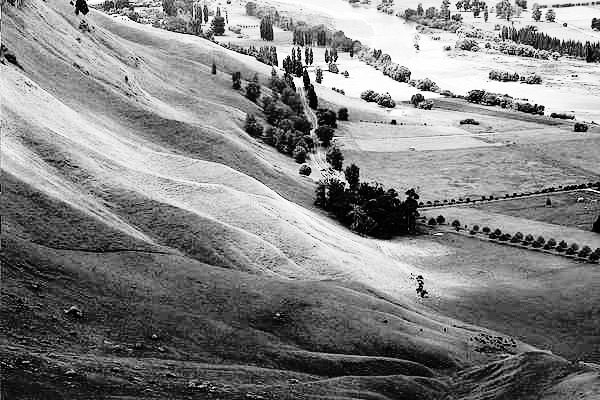

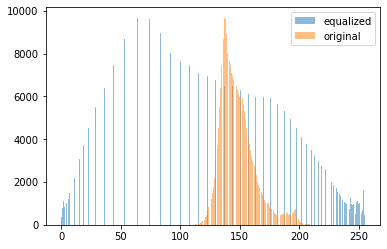

In [148]:
image = np.array(Image.open('data/600x400.png').convert('L'))
equalized_image,mask = seq_with_plotting(image,np.ones(image.shape)*255)
equalized_image


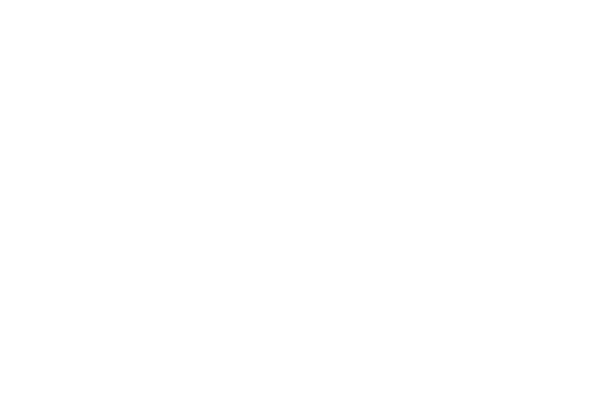

In [149]:
mask # biały obrazek

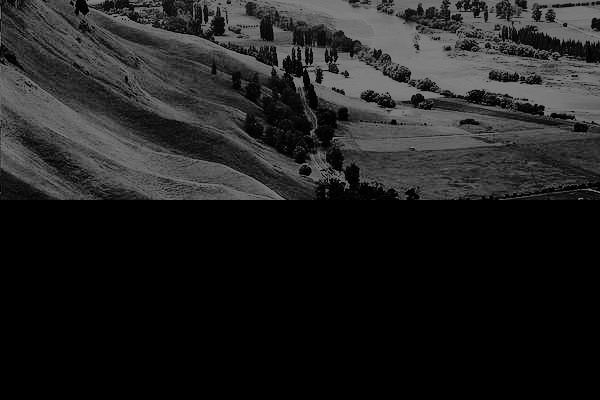

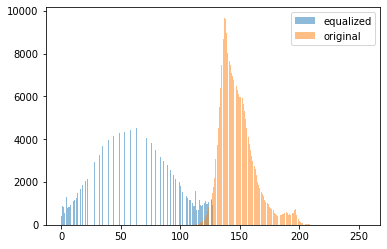

In [150]:
image = np.array(Image.open('data/600x400.png').convert('L'))
mask = np.zeros(image.shape)
for row_id,row in enumerate(mask[:len(mask)//2]):
    mask[row_id]=255
    
equalized_image, mask = seq_with_plotting(image,mask)
equalized_image

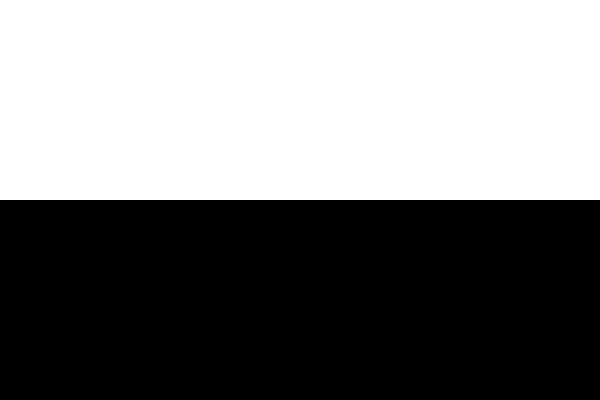

In [151]:
mask #pierwsze pół wysokości białe, drugie pół czarne

In [152]:
import cv2
image = np.array(Image.open('data/600x400.png').convert('L'))
img_black = np.zeros(image.shape,np.uint8)
img_circle = cv2.circle(img_black,(300,200), 200, 255,-1)

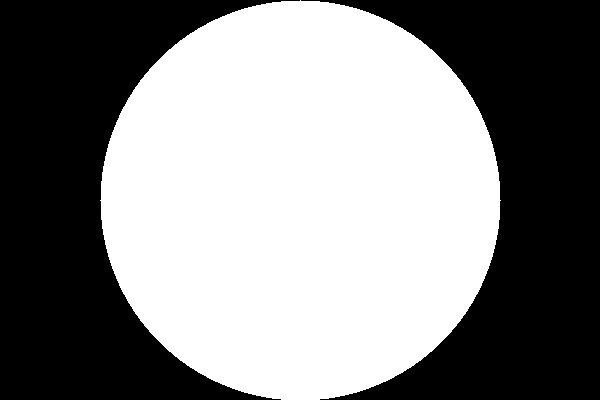

In [153]:
Image.fromarray(img_circle)

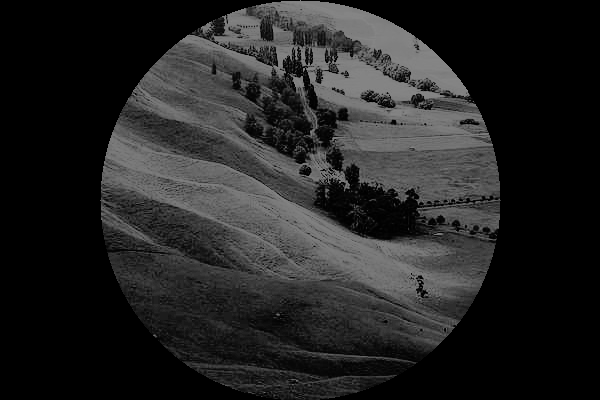

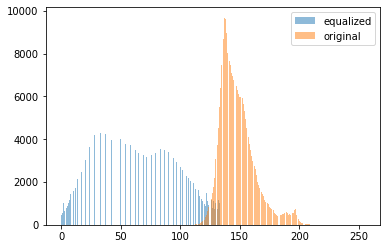

In [154]:
equalized_image, mask = seq_with_plotting(image,img_circle)
equalized_image

In [155]:
from cuda import parallel
from seq import sequential
image = np.array(Image.open('data/2000x924.png').convert('L'))
mask = np.zeros(image.shape)

In [156]:
# %%timeit -r 5 -n 10
# parallel(image,mask,256)

In [157]:
# %%timeit -r 5 -n 10
# sequential(image,mask,256)